In [1]:
import matplotlib.pyplot as mat
import keras

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


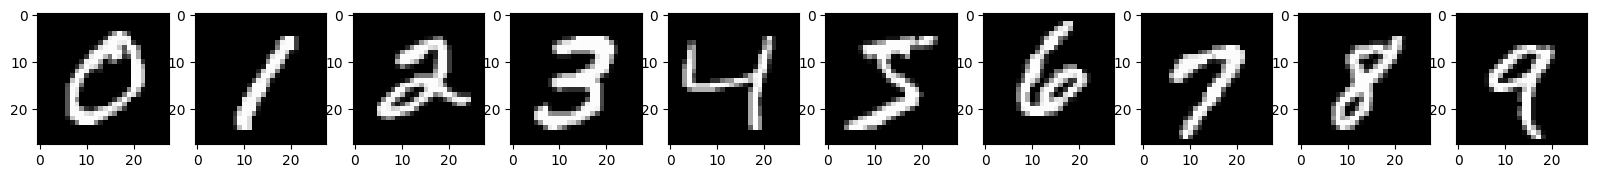

In [4]:
f,ax=mat.subplots(1,10,figsize=(20,20))
for i in range(0,10):
    sam=x_train[y_train==i][0]
    ax[i].imshow(sam,cmap='gray')

In [5]:
y_train=keras.utils.np_utils.to_categorical(y_train,10)
y_test=keras.utils.np_utils.to_categorical(y_test,10)

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import SGD

In [9]:
model=Sequential([
    Dense(128,input_shape=(784,),activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.1,momentum=0),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(x=x_train,y=y_train,batch_size=512,epochs=11)

Epoch 1/11
118/118 [==============================] - 1s 6ms/step - loss: 0.8804 - accuracy: 0.7464
Epoch 2/11
118/118 [==============================] - 1s 6ms/step - loss: 0.4136 - accuracy: 0.8804
Epoch 3/11
118/118 [==============================] - 1s 6ms/step - loss: 0.3394 - accuracy: 0.9016
Epoch 4/11
118/118 [==============================] - 1s 6ms/step - loss: 0.2975 - accuracy: 0.9144
Epoch 5/11
118/118 [==============================] - 1s 6ms/step - loss: 0.2689 - accuracy: 0.9225
Epoch 6/11
118/118 [==============================] - 1s 6ms/step - loss: 0.2446 - accuracy: 0.9299
Epoch 7/11
118/118 [==============================] - 1s 6ms/step - loss: 0.2246 - accuracy: 0.9353
Epoch 8/11
118/118 [==============================] - 1s 5ms/step - loss: 0.2102 - accuracy: 0.9388
Epoch 9/11
118/118 [==============================] - 1s 5ms/step - loss: 0.1961 - accuracy: 0.9442
Epoch 10/11
118/118 [==============================] - 1s 5ms/step - loss: 0.1854 - accuracy: 0.9473

In [11]:
acc,los=model.evaluate(x_test,y_test)
print(acc)
print(los)

313/313 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9553
0.1460697501897812
0.955299973487854


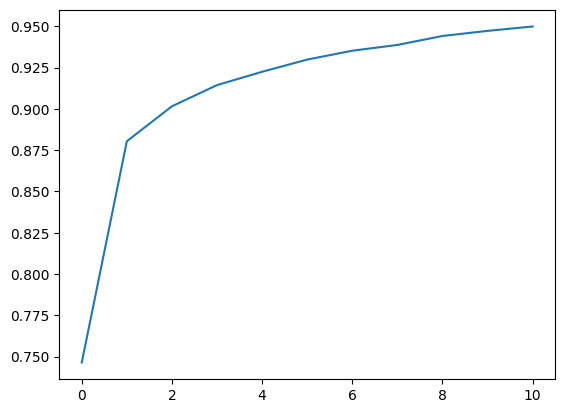

In [12]:
mat.plot(history.history['accuracy'])

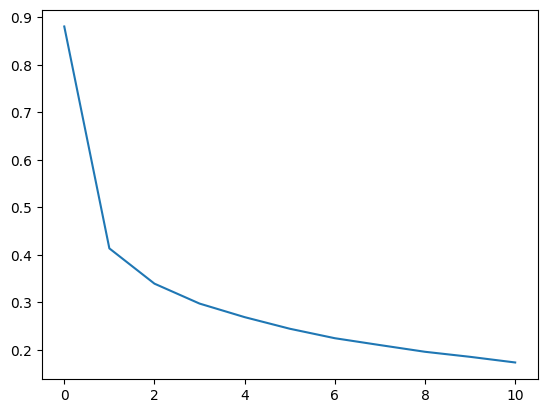

In [13]:
mat.plot(history.history['loss'])